# Lab 1. PyTorch and ANNs

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1-FHej0piZQEeBDTodXO6KrdqX6Uy1g9H?usp=sharing

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [14]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)

    Precondition: n > 0, type(n) == int

    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """

    sum=0
    if type(n)==int and n>=0:
      for i in range(1,n+1):
        sum+=i**3
      return(sum)
    else:
      print("Invalid Input")
      return(-1)

#example output
print(sum_of_cubes(3) == 36)

True


### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [15]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the substrings in the string, using sep as the separator string.
    
      sep
        The separator used to split the string.
    
        When set to None (the default value), will split on any whitespace
        character (including \\n \\r \\t \\f and spaces) and will discard
        empty strings from the result.
      maxsplit
        Maximum number of splits (starting from the left).
        -1 (the default value) means no limit.
    
    Note, str.split() is mainly useful for data that has been intentionally
    delimited.  With natural text that includes punctuation, consider using
    the regular expression module.



In [16]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.

    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """

    lengths = []
    words = sentence.split(' ')
    for word in words:
      lengths.append(len(word))
    return(lengths)

#example output
print(word_lengths("machine learning is so cool"))

[7, 8, 2, 2, 4]


### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [17]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.

    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """

    call_output = word_lengths(sentence)
    word_len = call_output[0]
    count = 0
    for i in call_output:
      if i == word_len:
        count+=1
      else:
        count+=0
    if count == len(call_output):
      return(True)
    else:
      return(False)

#example output
print(all_same_length("all same length"))
print(all_same_length("hello world"))


False
True


## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [18]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [19]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [20]:
matrix.size

12

In [21]:
matrix.shape

(3, 4)

In [22]:
vector.size

4

In [23]:
vector.shape

(4,)

"NumpyArray.size" gives us the total number of entries in an array (list of lists) or vector (single list). In the case of matrix above which has 12 entries, 4 in each of the three lists, matrix.size gave us 12, and similarly gave us 4 for the list vector which has 4 entries.

"NumpyArray.shape" gives us the dimesnsions of the array, in the form of number of entires in each element of the array (list of lists) or vector (single list) in the form of a tuple. In this case the array matrix has 3 lists (rows or elements) and 4 entries (columns) in each thus giving us (3,4), and the vector list only has 4 rows but 1 column, thus giving us (4,).

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [24]:
output = []
rowxcol_sum = 0
for i in range(0, len(matrix)):
  for j in range(0,len(matrix[i])):
    rowxcol_sum += ((matrix[i][j])*(vector[j]))
  output.append(rowxcol_sum)
  rowxcol_sum=0
output = np.array(output)

In [25]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [26]:
output2 = np.dot(matrix,vector)

In [27]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [28]:
print(np.array_equal(output, output2))

True


Since the result of the statement above is true, output and output2 match!

### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [32]:
import time

# record the time before running code
start_time1 = time.time()

# place code to run here
np.dot(matrix,vector)

# record the time after the code is run
end_time1 = time.time()

# compute the difference
diff1 = end_time1 - start_time1
print(diff1)

import time

# record the time before running code
start_time2 = time.time()

# place code to run here
output = []
rowxcol_sum = 0
for i in range(0, len(matrix)):
  for j in range(0,len(matrix[i])):
    rowxcol_sum += ((matrix[i][j])*(vector[j]))
  output.append(rowxcol_sum)
  rowxcol_sum=0
output = np.array(output)

# record the time after the code is run
end_time2 = time.time()

# compute the difference
diff2 = end_time2 - start_time2
print(diff2)

0.00017905235290527344
0.00037980079650878906


The time taken to take a dot product using np.dot is 0.00015783309936523438 seconds, as compared to the 0.0003814697265625 seconds taken by the code using no numpy functions. Thus using np.dot is a lot faster than the code from part(c).

## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”,
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects.

In [33]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [34]:
from PIL import Image
import requests
from io import BytesIO
open = requests.get("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")
img = Image.open(BytesIO(open.content))

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`.

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction,
and the second dimension indicates the X (column) dimension.

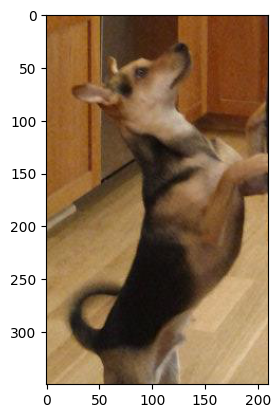

In [35]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1]
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the
closest endpoint. Display the image using `plt.imshow`.

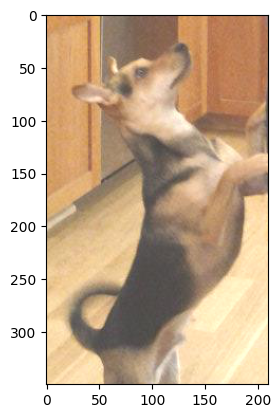

In [36]:
#Normalizing the array, adding the constat, and clipping the image
img_add = np.clip((((np.array(img)/255)+0.25)), 0, 1)
plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

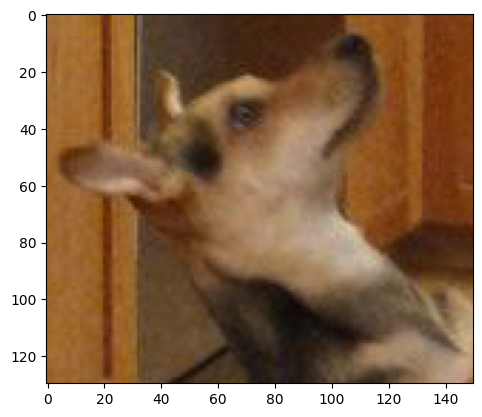

In [37]:
#Cropping and removing alpha channel from lists
img_cropped = np.array(img)[20:150, 20:170, 0:3]
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [38]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [39]:
img_torch = torch.from_numpy(img_cropped/255)
print(img_torch)

tensor([[[0.6353, 0.4353, 0.2275],
         [0.6431, 0.4431, 0.2353],
         [0.6510, 0.4510, 0.2431],
         ...,
         [0.4627, 0.2157, 0.0471],
         [0.4784, 0.2235, 0.0667],
         [0.5059, 0.2510, 0.0941]],

        [[0.6392, 0.4392, 0.2314],
         [0.6392, 0.4353, 0.2392],
         [0.6353, 0.4314, 0.2353],
         ...,
         [0.4784, 0.2314, 0.0627],
         [0.5098, 0.2549, 0.0980],
         [0.5176, 0.2627, 0.1059]],

        [[0.6392, 0.4392, 0.2314],
         [0.6314, 0.4275, 0.2314],
         [0.6235, 0.4196, 0.2235],
         ...,
         [0.4941, 0.2471, 0.0784],
         [0.5137, 0.2588, 0.1020],
         [0.5098, 0.2549, 0.0980]],

        ...,

        [[0.5961, 0.3765, 0.1765],
         [0.5804, 0.3608, 0.1608],
         [0.5961, 0.3765, 0.1843],
         ...,
         [0.7529, 0.6118, 0.5255],
         [0.7333, 0.5647, 0.4275],
         [0.7059, 0.5373, 0.4000]],

        [[0.6078, 0.3882, 0.1882],
         [0.6000, 0.3804, 0.1804],
         [0.

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [40]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [41]:
img_torch.numel()

58500

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

In [42]:
#to check if original tesnor variable is updated
img_torch.transpose(2,0)
#print(img_torch) -> returns same tensor without it being updated

#comparing the transposed tensor to the original one
new_img = img_torch.transpose(2,0)
#print(new_img)
print(torch.equal(img_torch, new_img))

False


The img_torch.transpose(2,0) changes the dimensions of the tensor in transposing it in such a way that is now has the 0th and 2nd dimension inputs are transposed from the original 3 dimensional tensor. The shape now becomes [3, 130, 150] instead of [150, 130, 3] which was the shape earlier. The original variable img_torch is not updated because we only called the transpose operation on the tensor but did not set it equal to the transpose operation. This also shown by the output of the last line that proves that the two tensors are not equivalent.

If we had instead done img_torch = img_torch.transpose(2,0), then the original variable would also have been updated. For now, they share a common space in computer memory and any further changes will affect both.

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

In [43]:
img_torch.unsqueeze(0)
print(img_torch.unsqueeze(0).shape)
print(img_torch.shape == img_torch.unsqueeze(0).shape)

torch.Size([1, 130, 150, 3])
False


As can be seen in the shape of the unsqueezed tensor for img, a new dimension is added to the 0th index of the dimension inputs of img_torch, this dimension is of size 1, and makes the tensor dimensions [1,130,150,3] instead of [130,150,3] as seen previously. The original varaible img_torch is not updated because we only called the unsqueeze operation on the tensor but did not set it equal to the unsqueezed fucntion itself. As can also be seen by the output of the last line which compares the unsqueezed tensor to the original one.

If we had instead done img_torch = img_torch.unsqueeze(0), then the original variable would also have been updated. For now, they share a common space in computer memory and any further changes will affect both.

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [44]:
#help(torch.max)

#number of colour channels, and list to store max value in each colour channel
x=img_torch.shape
max_val=[]
for i in range (len(x)):
  max_val.append(torch.max(img_torch[:,:,i]))

#list to tensor conversion
max_tensor = torch.Tensor(max_val)
print(max_tensor)


tensor([0.8941, 0.7882, 0.6745])


## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate

Please select at least three different options from the list above. For each option, please select two to three different parameters and provide a table.


In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()


# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [47]:
#For all changes the other parts of the code except the one I show as modified below remain the same.

#Training iterations - added an extra for loop for training 10 iterations instead of once

# for i in range(0,10):
#   for (image, label) in mnist_train:
#       # actual ground truth: is the digit less than 3?
#       actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
#       # pigeon prediction
#       out = pigeon(img_to_tensor(image)) # step 1-2
#       # update the parameters based on the loss
#       loss = criterion(out, actual)      # step 3
#       loss.backward()                    # step 4 (compute the updates for each parameter)
#       optimizer.step()                   # step 4 (make the updates for each parameter)
#       optimizer.zero_grad()              # a clean up step for PyTorch

#results
# Training Error Rate: 0.001
# Training Accuracy: 0.999
# Test Error Rate: 0.058
# Test Accuracy: 0.942

#Hidden units - Changed hidden units from 30 to 100

# # define a 2-layer artificial neural network
# class Pigeon(nn.Module):
#     def __init__(self):
#         super(Pigeon, self).__init__()
#         self.layer1 = nn.Linear(28 * 28, 100)
#         self.layer2 = nn.Linear(100, 1)
#     def forward(self, img):
#         flattened = img.view(-1, 28 * 28)
#         activation1 = self.layer1(flattened)
#         activation1 = F.relu(activation1)
#         activation2 = self.layer2(activation1)
#         return activation2

#results
# Training Error Rate: 0.03
# Training Accuracy: 0.97
# Test Error Rate: 0.077
# Test Accuracy: 0.923

#Number of layers - Added in an extra layer, so 3 instead of 2

# define a 2-layer artificial neural network
# class Pigeon(nn.Module):
#     def __init__(self):
#         super(Pigeon, self).__init__()
#         self.layer1 = nn.Linear(28 * 28, 100)
#         self.layer2 = nn.Linear(100, 100)
#         self.layer3 = nn.linear(100, 1)                #new layer
#     def forward(self, img):
#         flattened = img.view(-1, 28 * 28)
#         activation1 = self.layer1(flattened)
#         activation1 = F.relu(activation1)
#         activation2 = self.layer2(activation1)
#         activation3 = self.layer3(activation2)
#         return activation3

#results
# Training Error Rate: 0.039
# Training Accuracy: 0.961
# Test Error Rate: 0.087
# Test Accuracy: 0.913

#Types of activation functions - tanh, relu used instead of sigmoid

# error = 0
# for (image, label) in mnist_train:
#     prob = torch.tanh(pigeon(img_to_tensor(image)))                     #also tried relu
#     if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
#         error += 1
# print("Training Error Rate:", error/len(mnist_train))
# print("Training Accuracy:", 1 - error/len(mnist_train))


# # computing the error and accuracy on a test set
# error = 0
# for (image, label) in mnist_val:
#     prob = torch.tanh(pigeon(img_to_tensor(image)))                  #also tried relu
#     if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
#         error += 1
# print("Test Error Rate:", error/len(mnist_val))
# print("Test Accuracy:", 1 - error/len(mnist_val))

#results - tanh
# Training Error Rate: 0.05
# Training Accuracy: 0.95
# Test Error Rate: 0.099
# Test Accuracy: 0.901

#-relu
# Training Error Rate: 0.049
# Training Accuracy: 0.951
# Test Error Rate: 0.1
# Test Accuracy: 0.9

#learning rate - changed from 0.005 to 0.01, and other values

# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(pigeon.parameters(), lr=0.01, momentum=0.9)

#results, lr=0.01
# Training Error Rate: 0.05
# Training Accuracy: 0.95
# Test Error Rate: 0.096
# Test Accuracy: 0.904

Based on the results in the code block above, changing the training iterations from 1 to 10 resulted in the best accuracy. With training accuracy jumping up to 0.999. Other changes did not have a more significant effect than this but using the relu and tanh fucntions slightly decreased training accuracies down to 0.95. Learning rate and hidden units by themselves did not have much of an impact but when used together with increased training iterations they further increased the training accuracy to almost 100%. I felt like changing the number of layers had more impact the hidden units and learning rate when used individually but a lesser impact when used in conjunction.

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

Based on the results in the code block above, changing the training iterations from 1 to 10 resulted in the best accuracy. With testing accuracy jumping up to 0.942. Other changes did not have a more significant effect than this but changing the hidden units also imporved testing accuracies slightly upto 0.923. Learning rate and activation functions by themselves did not have much of an impact but when used together with increased training iterations they further increased the testing accuracy to almost 95%. I felt like changing the number of hidden units had more impact the learning rate, which even when changed to a higher or lower value from 0.005 didn't actually lead to any better accuray results in the testing data.

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

Hyperparameters from (b), or the ones that affect the testing data accuracy more should definiely be preferred over the ones in (a). This is because training data hyperparameters can often be overfit and not entirely reprsentative of the accuracy in a generalized case. A better accuracy on unseen data shows a sense of generalizability which is desired more than perfection on a training set, as most real life examples comprise of random data.